In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#df = pd.read_csv("drive/MyDrive/compiled_df.csv")
df = pd.read_csv("/Users/shaun/Desktop/compiled_df.csv")
df

,cell_line,transcript_id,transcript_position,start,end,n_reads,dwelling_t-1,sd_-1,mean_-1,dwelling_t0,...,knf_CT,knf_CG,cksnap_AA,cksnap_AT,cksnap_AC,cksnap_GT,cksnap_GC,js_all,eiip,prediction
0,A549,ENST00000547665,559,760859491,760859690,2,0.006289,3.765678,110.700000,0.020420,...,0.000000,0.0,0.00,0.00,0.75,0.00,0.00,0.666667,0.122943,0.009351
1,A549,ENST00000450744,889,710329043,710329335,2,0.009228,5.604509,116.700000,0.010925,...,0.000000,0.0,0.00,0.00,0.25,0.00,0.25,0.666667,0.108829,0.011313
2,A549,ENST00000314888,3452,701519886,701520209,3,0.004106,5.399771,117.166667,0.004066,...,0.166667,0.0,0.00,0.25,0.25,0.00,0.25,0.511111,0.123943,0.287240
3,A549,ENST00000330387,4761,705936980,705937181,2,0.006140,6.374500,103.500000,0.009416,...,0.000000,0.0,0.50,0.00,0.25,0.00,0.00,0.666667,0.128214,0.004840
4,A549,ENST00000391411,6156,159215334,159215547,2,0.006267,1.223535,90.300000,0.004827,...,0.000000,0.0,0.50,0.00,0.00,0.00,0.00,0.583333,0.129286,0.000879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664065,HepG2,ENST00000595661,535,676623619,676624056,4,0.008062,2.623278,120.900000,0.010874,...,0.166667,0.0,0.00,0.25,0.00,0.25,0.25,0.511111,0.117386,0.031007
2664066,HepG2,ENST00000509967,4822,2066753654,2066753772,1,0.003980,4.037000,129.500000,0.011961,...,0.166667,0.0,0.00,0.25,0.25,0.25,0.00,0.511111,0.123871,0.001654
2664067,HepG2,ENST00000569636,640,882255390,882255543,1,0.004980,2.636000,117.700000,0.003233,...,0.000000,0.0,0.00,0.00,0.25,0.00,0.50,0.583333,0.117529,0.303932
2664068,HepG2,ENST00000571589,5826,660453008,660453211,2,0.002990,3.336000,117.500000,0.005761,...,0.000000,0.0,0.50,0.00,0.25,0.00,0.00,0.600000,0.120657,0.252910


In [2]:
a, b = (df['prediction'] > 0.5).value_counts()
b/(a+b)

0.03715855814599466

In [16]:
df['label'] = df['prediction'].apply(lambda x: 1 if x > 0.5 else 0)
df

,cell_line,transcript_id,transcript_position,start,end,n_reads,dwelling_t-1,sd_-1,mean_-1,dwelling_t0,...,knf_CG,cksnap_AA,cksnap_AT,cksnap_AC,cksnap_GT,cksnap_GC,js_all,eiip,prediction,label
0,A549,ENST00000547665,559,760859491,760859690,2,0.006289,3.765678,110.700000,0.020420,...,0.0,0.00,0.00,0.75,0.00,0.00,0.666667,0.122943,0.009351,0
1,A549,ENST00000450744,889,710329043,710329335,2,0.009228,5.604509,116.700000,0.010925,...,0.0,0.00,0.00,0.25,0.00,0.25,0.666667,0.108829,0.011313,0
2,A549,ENST00000314888,3452,701519886,701520209,3,0.004106,5.399771,117.166667,0.004066,...,0.0,0.00,0.25,0.25,0.00,0.25,0.511111,0.123943,0.287240,0
3,A549,ENST00000330387,4761,705936980,705937181,2,0.006140,6.374500,103.500000,0.009416,...,0.0,0.50,0.00,0.25,0.00,0.00,0.666667,0.128214,0.004840,0
4,A549,ENST00000391411,6156,159215334,159215547,2,0.006267,1.223535,90.300000,0.004827,...,0.0,0.50,0.00,0.00,0.00,0.00,0.583333,0.129286,0.000879,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664065,HepG2,ENST00000595661,535,676623619,676624056,4,0.008062,2.623278,120.900000,0.010874,...,0.0,0.00,0.25,0.00,0.25,0.25,0.511111,0.117386,0.031007,0
2664066,HepG2,ENST00000509967,4822,2066753654,2066753772,1,0.003980,4.037000,129.500000,0.011961,...,0.0,0.00,0.25,0.25,0.25,0.00,0.511111,0.123871,0.001654,0
2664067,HepG2,ENST00000569636,640,882255390,882255543,1,0.004980,2.636000,117.700000,0.003233,...,0.0,0.00,0.00,0.25,0.00,0.50,0.583333,0.117529,0.303932,0
2664068,HepG2,ENST00000571589,5826,660453008,660453211,2,0.002990,3.336000,117.500000,0.005761,...,0.0,0.50,0.00,0.25,0.00,0.00,0.600000,0.120657,0.252910,0


In [4]:
df.columns

Index(['cell_line', 'transcript_id', 'transcript_position', 'start', 'end',
       'n_reads', 'dwelling_t-1', 'sd_-1', 'mean_-1', 'dwelling_t0', 'sd_0',
       'mean_0', 'dwelling_t1', 'sd_1', 'mean_1', 'nucleo_-3_A', 'nucleo_-3_G',
       'nucleo_-3_T', 'nucleo_-2_A', 'nucleo_-2_G', 'nucleo_-1_G',
       'nucleo_2_C', 'nucleo_2_T', 'nucleo_2_A', 'nucleo_3_A', 'nucleo_3_G',
       'nucleo_3_T', 'nucleo_3_C', 'pwm_score', 'knf_AA', 'knf_AG', 'knf_AT',
       'knf_AC', 'knf_GG', 'knf_TT', 'knf_TA', 'knf_TG', 'knf_CA', 'knf_CT',
       'knf_CG', 'cksnap_AA', 'cksnap_AT', 'cksnap_AC', 'cksnap_GT',
       'cksnap_GC', 'js_all', 'eiip', 'prediction', 'label'],
      dtype='object')

<Axes: xlabel='cell_line', ylabel='mean_0'>

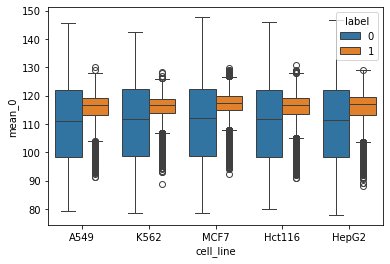

In [5]:
sns.boxplot(x='cell_line', y='mean_0', hue = 'label', data=df)

/Users/shaun/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/shaun/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/shaun/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


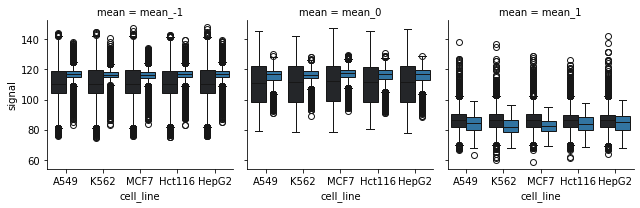

In [6]:
new_df = pd.melt(df, id_vars=['cell_line', 'transcript_id', 'transcript_position', 'label'], value_vars=['mean_-1', 'mean_0', 'mean_1'],
        var_name='mean', value_name='signal')

g = sns.FacetGrid(new_df, col = "mean")
g.map_dataframe(sns.boxplot, x="cell_line", y="signal", hue = 'label')

/Users/shaun/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/shaun/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/shaun/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


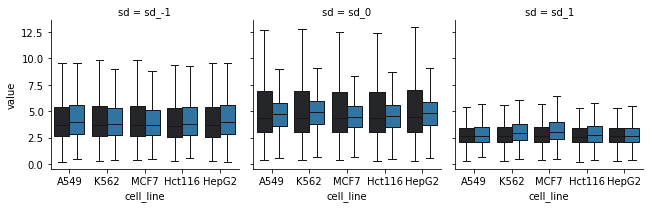

In [7]:
new_df = pd.melt(df, id_vars=['cell_line', 'transcript_id', 'transcript_position', 'label'], value_vars=['sd_-1', 'sd_0', 'sd_1'],
        var_name='sd', value_name='value')

g = sns.FacetGrid(new_df, col = "sd")
g.map_dataframe(sns.boxplot, x="cell_line", y="value", hue = 'label', showfliers=False)

/Users/shaun/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/shaun/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/shaun/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


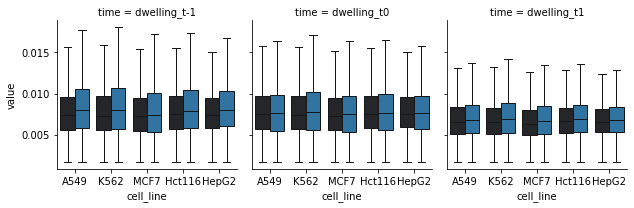

In [8]:
new_df = pd.melt(df, id_vars=['cell_line', 'transcript_id', 'transcript_position', 'label'], value_vars=['dwelling_t-1', 'dwelling_t0', 'dwelling_t1'],
        var_name='time', value_name='value')

g = sns.FacetGrid(new_df, col = "time")
g.map_dataframe(sns.boxplot, x="cell_line", y="value", hue = 'label', showfliers=False)

<Axes: xlabel='prediction', ylabel='Density'>

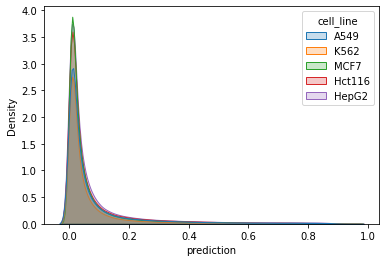

In [9]:
sns.kdeplot(data=df, x='prediction', hue='cell_line', fill=True, common_norm= True)

<Axes: xlabel='cell_line', ylabel='eiip'>

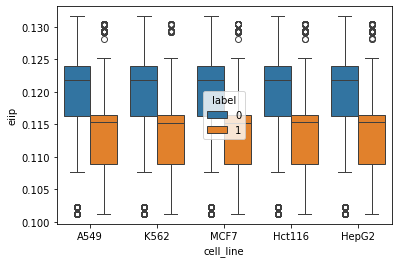

In [10]:
sns.boxplot(x='cell_line', y='eiip', hue = 'label', data=df)

<Axes: xlabel='cell_line', ylabel='pwm_score'>

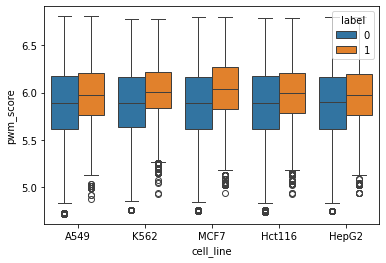

In [11]:
sns.boxplot(x='cell_line', y='pwm_score', hue = 'label', data=df)

In [15]:
df

,cell_line,transcript_id,transcript_position,start,end,n_reads,dwelling_t-1,sd_-1,mean_-1,dwelling_t0,...,knf_CT,knf_CG,cksnap_AA,cksnap_AT,cksnap_AC,cksnap_GT,cksnap_GC,js_all,eiip,prediction
0,A549,ENST00000547665,559,760859491,760859690,2,0.006289,3.765678,110.700000,0.020420,...,0.000000,0.0,0.00,0.00,0.75,0.00,0.00,0.666667,0.122943,0.009351
1,A549,ENST00000450744,889,710329043,710329335,2,0.009228,5.604509,116.700000,0.010925,...,0.000000,0.0,0.00,0.00,0.25,0.00,0.25,0.666667,0.108829,0.011313
2,A549,ENST00000314888,3452,701519886,701520209,3,0.004106,5.399771,117.166667,0.004066,...,0.166667,0.0,0.00,0.25,0.25,0.00,0.25,0.511111,0.123943,0.287240
3,A549,ENST00000330387,4761,705936980,705937181,2,0.006140,6.374500,103.500000,0.009416,...,0.000000,0.0,0.50,0.00,0.25,0.00,0.00,0.666667,0.128214,0.004840
4,A549,ENST00000391411,6156,159215334,159215547,2,0.006267,1.223535,90.300000,0.004827,...,0.000000,0.0,0.50,0.00,0.00,0.00,0.00,0.583333,0.129286,0.000879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664065,HepG2,ENST00000595661,535,676623619,676624056,4,0.008062,2.623278,120.900000,0.010874,...,0.166667,0.0,0.00,0.25,0.00,0.25,0.25,0.511111,0.117386,0.031007
2664066,HepG2,ENST00000509967,4822,2066753654,2066753772,1,0.003980,4.037000,129.500000,0.011961,...,0.166667,0.0,0.00,0.25,0.25,0.25,0.00,0.511111,0.123871,0.001654
2664067,HepG2,ENST00000569636,640,882255390,882255543,1,0.004980,2.636000,117.700000,0.003233,...,0.000000,0.0,0.00,0.00,0.25,0.00,0.50,0.583333,0.117529,0.303932
2664068,HepG2,ENST00000571589,5826,660453008,660453211,2,0.002990,3.336000,117.500000,0.005761,...,0.000000,0.0,0.50,0.00,0.25,0.00,0.00,0.600000,0.120657,0.252910


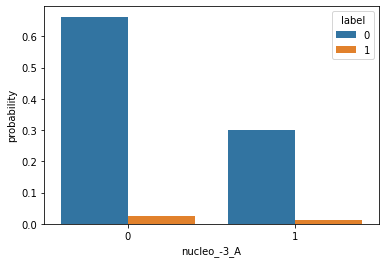

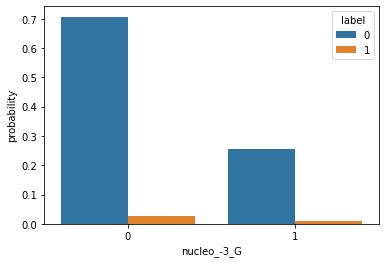

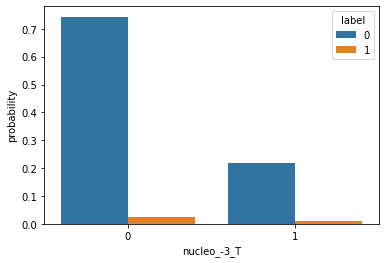

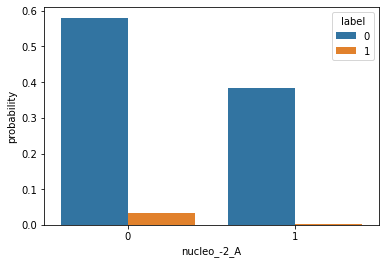

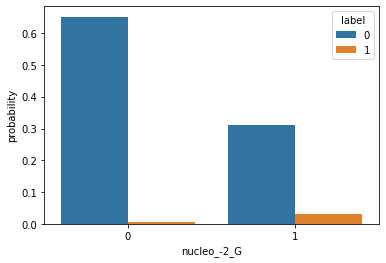

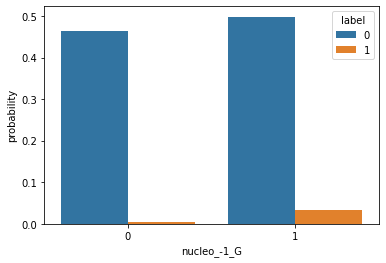

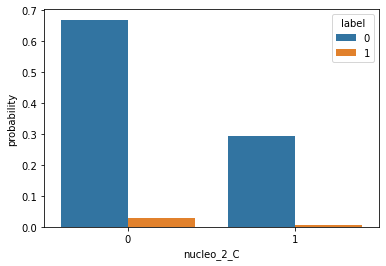

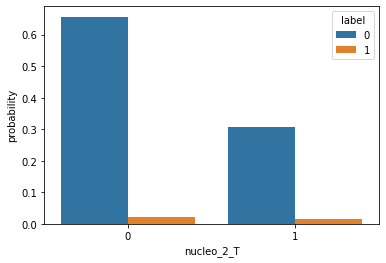

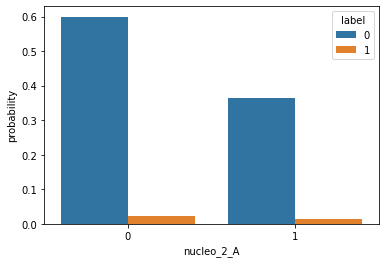

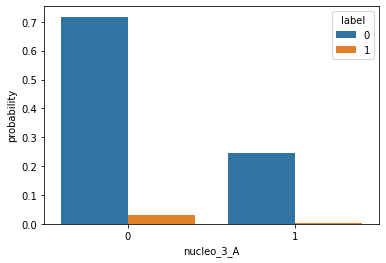

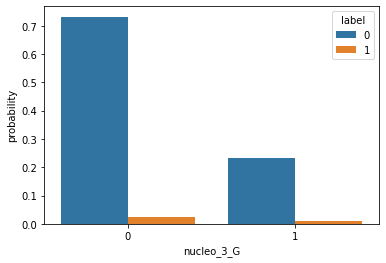

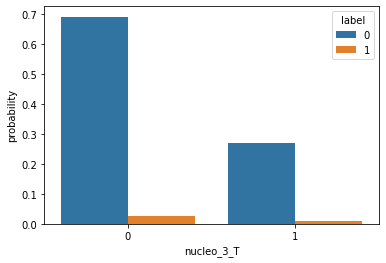

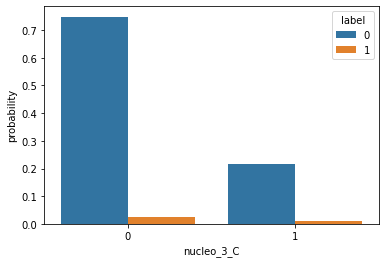

In [17]:
for column in ['nucleo_-3_A', 'nucleo_-3_G',
       'nucleo_-3_T', 'nucleo_-2_A', 'nucleo_-2_G', 'nucleo_-1_G',
       'nucleo_2_C', 'nucleo_2_T', 'nucleo_2_A', 'nucleo_3_A', 'nucleo_3_G',
       'nucleo_3_T', 'nucleo_3_C']:
    sns.countplot(data=df, x=column, hue='label', stat="probability")
    plt.show()